## Geometric Grid based Structural Interdependence Function

In [31]:
from tinybig.util import set_random_seed

random_seed = 123
set_random_seed(random_seed=random_seed)

#### CIFAR-10 Example Image Loading

False Compose(
    ToTensor()
)
Files already downloaded and verified
Files already downloaded and verified


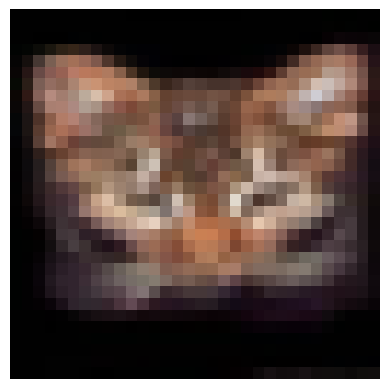

torch.Size([3, 32, 32]) torch.Size([3072])


In [32]:
from tinybig.data import cifar10
import matplotlib.pyplot as plt

cifar10_data = cifar10(train_batch_size=1, test_batch_size=1)
data_loader = cifar10_data.load(cache_dir='./data/', with_transformation=False)
for x, y in data_loader['train_loader']:
    break
img = x[0]

img_to_show = img.permute(1, 2, 0)
plt.imshow(img_to_show)
plt.axis('off')  # optional, to hide the axis
plt.show()

img_flat = img.flatten()
print(img.shape, img_flat.shape)

#### Grid based Structural Interdependence Function

In [33]:
from tinybig.koala.geometry import grid, cylinder
from tinybig.interdependence import geometric_interdependence

# radius of the cylinder circular surface
p_r = 4

dep_func = geometric_interdependence(
    name='geometric_interdependence',
    interdependence_type='attribute',
    grid=grid(h=32, w=32, d=1, universe_num=3),
    patch=cylinder(p_r=p_r, p_d=0, p_d_prime=0),
    packing_strategy='densest_packing',
    interdependence_matrix_mode='padding',
)

p = dep_func.get_patch_size()
m_prime = dep_func.calculate_m_prime()
print('patch_size: ', p, '; m_prime: ', m_prime)

A = dep_func.calculate_A()
print('interdependence matrix A shape: ', A.shape)

xi_x = dep_func(x=img_flat.unsqueeze(0)).squeeze(0)
print('xi_x shape: ', xi_x.shape)

patch_size:  49 ; m_prime:  150528
interdependence matrix A shape:  torch.Size([1024, 50176])
xi_x shape:  torch.Size([150528])


In [34]:
import torch

def reshape_to_circle(arr, center_x=4, center_y=4, radius=4, square_size=9):
    if len(arr) != 49:
        raise ValueError("Input array must have exactly 49 values.")

    # Initialize a square with zeros
    square = torch.zeros((square_size, square_size))

    # Generate coordinates covered by the circle
    circle_coords = []
    for x in range(center_x - radius, center_x + radius + 1):
        for y in range(center_y - radius, center_y + radius + 1):
            if (x - center_x) ** 2 + (y - center_y) ** 2 <= radius ** 2:
                circle_coords.append((x, y))

    # Place values from `arr` into these coordinates
    for i, (x, y) in enumerate(circle_coords):
        square[x, y] = arr[i]

    return square

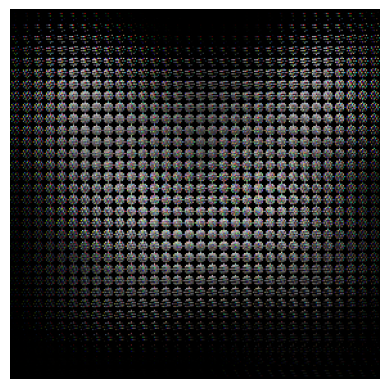

In [35]:
import torch
import matplotlib.pyplot as plt

# the padding mode will reorder the channel to the last dimension

xi_x = xi_x.reshape(32, 32, 49, 3).permute(0, 1, 3, 2)

reshaped_tensor = torch.zeros((32, 32, 3, 9, 9))
for i in range(32):
    for j in range(32):
        for k in range(3):
            reshaped_tensor[i, j, k] = reshape_to_circle(xi_x[i, j, k])

reshaped_tensor = reshaped_tensor.permute(0, 3, 1, 4, 2).reshape(32*9, 32*9, 3)

plt.imshow(reshaped_tensor)
plt.axis('off')
plt.show()

In [36]:
from tinybig.koala.geometry import grid, cylinder
from tinybig.interdependence import geometric_interdependence

# radius of the cylinder circular surface
p_r = 4

dep_func = geometric_interdependence(
    name='geometric_interdependence',
    interdependence_type='attribute',
    grid=grid(h=32, w=32, d=1, universe_num=3),
    patch=cylinder(p_r=p_r, p_d=0, p_d_prime=0),
    packing_strategy='densest_packing',
    interdependence_matrix_mode='aggregation',
)

p = dep_func.get_patch_size()
m_prime = dep_func.calculate_m_prime()
print('patch_size: ', p, '; m_prime: ', m_prime)

A = dep_func.calculate_A()
print('interdependence matrix A shape: ', A.shape)

xi_x = dep_func(x=img_flat.unsqueeze(0)).squeeze(0)
print('xi_x shape: ', xi_x.shape)

patch_size:  49 ; m_prime:  3072
interdependence matrix A shape:  torch.Size([1024, 1024])
xi_x shape:  torch.Size([3072])


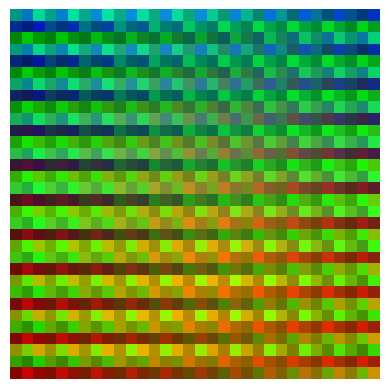

In [37]:
import matplotlib.pyplot as plt

img = xi_x.reshape(3, 32, 32)

# the aggregation mode will create values outside the range, we will process it below.
img = img - img.min()
img = img / img.max()

img_to_show = img.permute(1, 2, 0)
plt.imshow(img_to_show)
plt.axis('off')  # optional, to hide the axis
plt.show()

In [1]:
from tinybig.util import set_random_seed

random_seed = 42
set_random_seed(random_seed=random_seed)

from tinybig.data import cifar10

cifar10_data = cifar10(train_batch_size=1, test_batch_size=1)
data_loader = cifar10_data.load(cache_dir='./data/', with_transformation=False)
for x, y in data_loader['train_loader']:
    break
img = x[0]

img_flat = img.flatten()
print(img.shape, img_flat.shape)

from tinybig.config.base_config import config

config_obj = config(name='structural_interdependence_function_config')
func_configs = config_obj.load_yaml(cache_dir='./configs', config_file='structural_interdependence_function_config.yaml')

dep_func = config.instantiation_from_configs(
    configs=func_configs['data_interdependence_function_configs'], 
    class_name='data_interdependence_function_class', 
    parameter_name='data_interdependence_function_parameters'
)

m_prime = dep_func.calculate_m_prime()
A = dep_func.calculate_A()
xi_x = dep_func(x=img_flat.unsqueeze(0)).squeeze(0)

print('m_prime:', m_prime)
print('attribute_A:', A.shape)
print('attribute_xi_X:', xi_x.shape)

Files already downloaded and verified
Files already downloaded and verified
torch.Size([3, 32, 32]) torch.Size([3072])
m_prime: 150528
attribute_A: torch.Size([1024, 50176])
attribute_xi_X: torch.Size([150528])
